In [40]:
import pandas as pd


In [41]:
df = pd.read_csv('income.csv')

In [42]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [43]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [44]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [45]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [46]:
df = pd.concat([df.drop('occupation', axis = 1), pd.get_dummies(df.occupation, dtype='int64').add_prefix('occupation_')],axis=1)
df = pd.concat([df.drop('workclass', axis = 1), pd.get_dummies(df.workclass, dtype='int64').add_prefix('workclass_')],axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status'], dtype='int64').add_prefix('marital-status_')],axis=1)
df = pd.concat([df.drop('relationship', axis = 1), pd.get_dummies(df.relationship, dtype='int64').add_prefix('relationship_')],axis=1)
df = pd.concat([df.drop('race', axis = 1), pd.get_dummies(df.race, dtype='int64').add_prefix('race_')],axis=1)
df = pd.concat([df.drop('native-country', axis = 1), pd.get_dummies(df['native-country'], dtype='int64').add_prefix('native-country_')],axis=1)

In [47]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [48]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [49]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


ERROR: Could not find a version that satisfies the requirement matplotlib.pylot (from versions: none)
ERROR: No matching distribution found for matplotlib.pylot


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt



<Axes: >

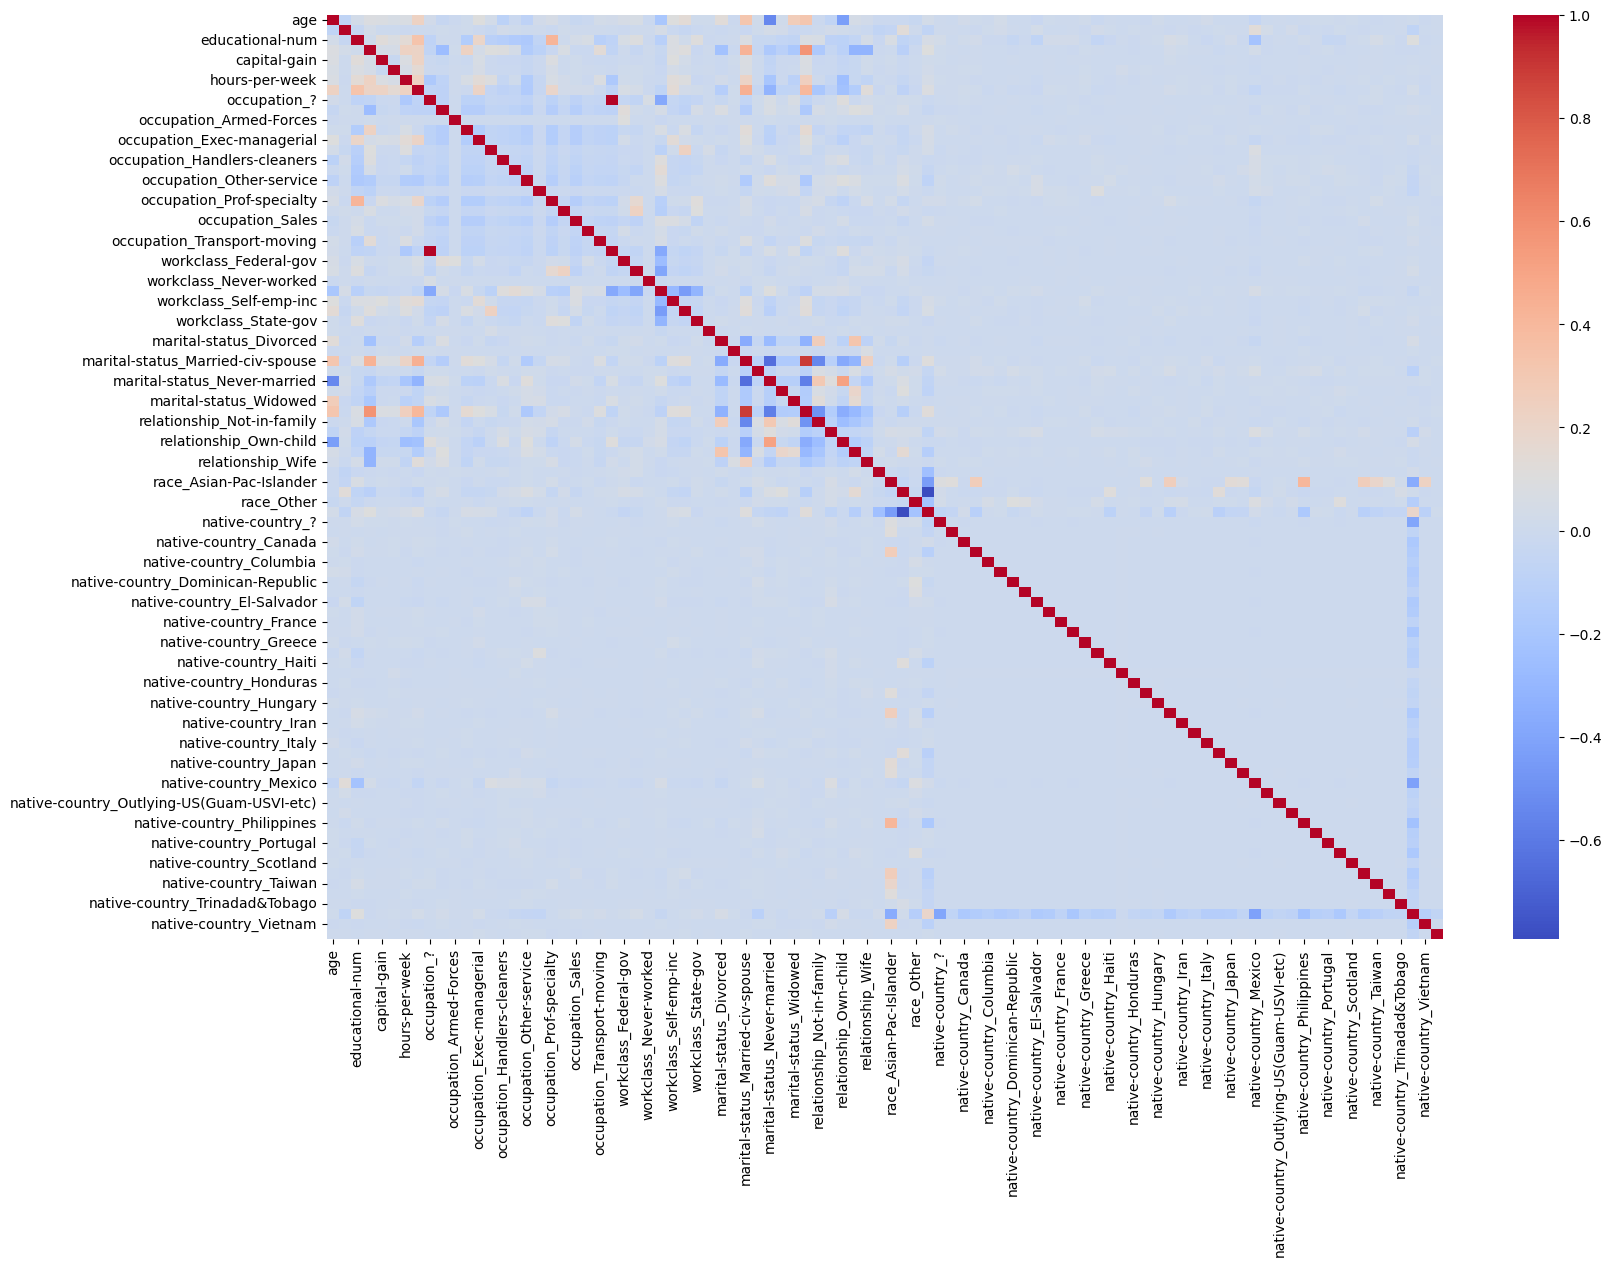

In [52]:
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot = False, cmap= 'coolwarm')

In [53]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [55]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [56]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

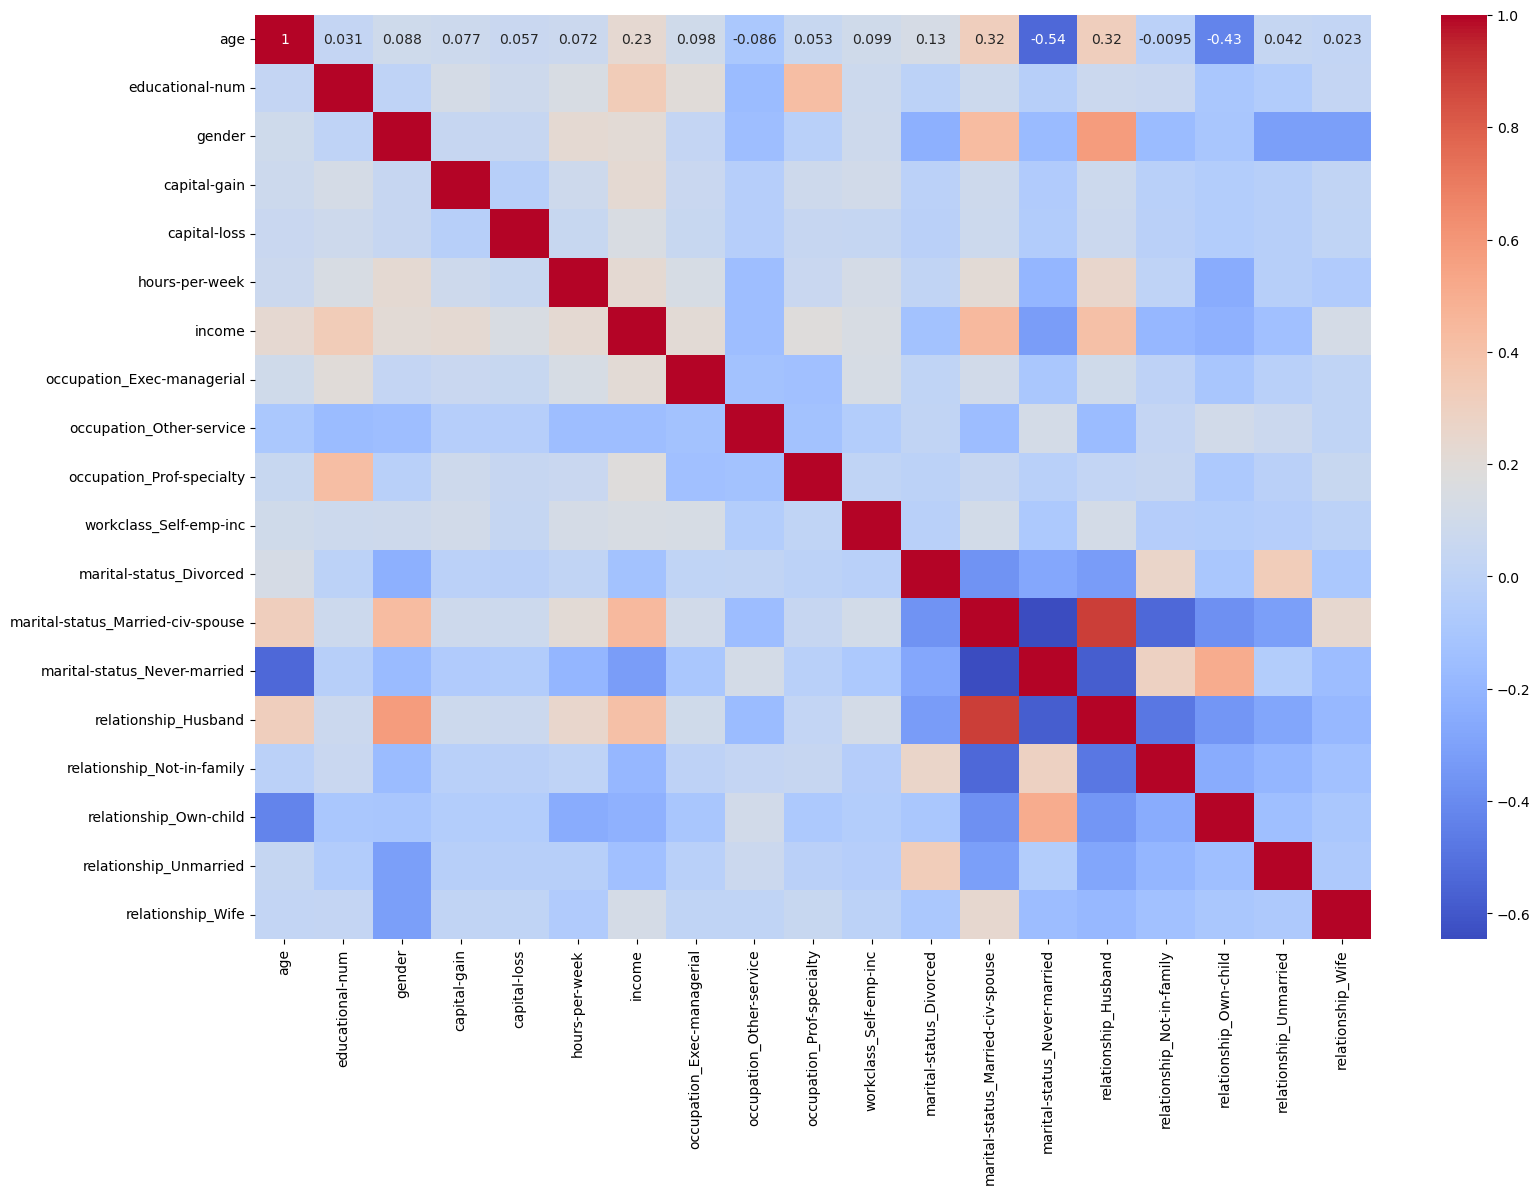

In [58]:
plt.figure(figsize = (18,12))
sns.heatmap(df_dropped.corr(), annot = True, cmap= 'coolwarm')

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size = 0.2)


In [70]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
4645,26,9,0,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17916,57,10,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36812,34,9,1,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29423,31,3,1,0,0,56,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4591,52,8,1,0,0,60,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13740,51,13,1,0,0,37,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15873,36,9,1,0,0,69,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23150,46,13,1,15024,0,60,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28967,63,7,1,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [72]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [73]:
forest.score(test_X, test_y)

0.8444057733647251

In [74]:
forest.feature_importances_

array([2.28659923e-01, 1.29044870e-01, 1.51356399e-02, 1.09414984e-01,
       3.83418530e-02, 1.13142632e-01, 1.61189648e-03, 4.84556969e-03,
       5.91484298e-05, 5.66975616e-03, 1.99968638e-02, 4.56068690e-03,
       3.47619598e-03, 4.16270541e-03, 7.79456492e-03, 2.13088803e-04,
       1.72826274e-02, 2.80878260e-03, 6.20870336e-03, 4.33498944e-03,
       4.36185329e-03, 1.81427001e-03, 4.99814278e-03, 5.53252394e-03,
       2.63873865e-06, 9.58646267e-03, 6.65007669e-03, 7.91557872e-03,
       4.51196993e-03, 1.94715843e-04, 6.62291341e-03, 3.95732899e-04,
       6.75074689e-02, 1.07725141e-03, 2.59278407e-02, 1.59563942e-03,
       1.87813541e-03, 5.30457227e-02, 9.12277909e-03, 1.72443106e-03,
       1.01397818e-02, 5.44156767e-03, 9.85977578e-03, 1.35794285e-03,
       3.05616762e-03, 4.60274873e-03, 9.42092776e-04, 6.03086127e-03,
       2.87235216e-03, 3.40983184e-04, 1.40822889e-03, 5.42332433e-04,
       3.48307029e-04, 6.24766689e-04, 2.38141137e-04, 1.64128188e-04,
      

In [75]:
importances  = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [76]:
importances

{'age': 0.22865992345354688,
 'educational-num': 0.12904487032997145,
 'hours-per-week': 0.11314263231537444,
 'capital-gain': 0.10941498362671137,
 'marital-status_Married-civ-spouse': 0.06750746892015382,
 'relationship_Husband': 0.05304572267619908,
 'capital-loss': 0.03834185297619918,
 'marital-status_Never-married': 0.02592784065449782,
 'occupation_Exec-managerial': 0.019996863770759862,
 'occupation_Prof-specialty': 0.017282627391276804,
 'gender': 0.015135639863053192,
 'relationship_Own-child': 0.010139781831771994,
 'relationship_Wife': 0.009859775778800522,
 'workclass_Private': 0.00958646267209282,
 'relationship_Not-in-family': 0.009122779086827465,
 'workclass_Self-emp-not-inc': 0.007915578721785596,
 'occupation_Other-service': 0.0077945649170071485,
 'workclass_Self-emp-inc': 0.006650076691196818,
 'marital-status_Divorced': 0.006622913408650117,
 'occupation_Sales': 0.006208703360871129,
 'native-country_United-States': 0.006110390916824808,
 'race_White': 0.006030861

In [77]:
from sklearn.model_selection import GridSearchCV



In [78]:
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5,10,30, None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt', 'log2']
    
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, verbose=10)

In [79]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   1.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   1.1s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   2.0s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   1.2s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [80]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [81]:
forest= grid_search.best_estimator_

In [82]:
forest.score(test_X, test_y)

0.8575084450813799

In [83]:
importances  = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [84]:
importances

{'age': 0.15125632543074644,
 'capital-gain': 0.13863860984730975,
 'educational-num': 0.12933468855253002,
 'marital-status_Married-civ-spouse': 0.09243012535916512,
 'hours-per-week': 0.09128756324775739,
 'relationship_Husband': 0.06665015318782264,
 'capital-loss': 0.045158170055543186,
 'marital-status_Never-married': 0.02681598752937979,
 'occupation_Exec-managerial': 0.025110038197273584,
 'occupation_Prof-specialty': 0.020908475579450195,
 'gender': 0.015248631549345196,
 'relationship_Not-in-family': 0.012782199201439054,
 'relationship_Wife': 0.012650837276606342,
 'relationship_Own-child': 0.011326952489169546,
 'occupation_Other-service': 0.009251383110457775,
 'workclass_Private': 0.008684550278373214,
 'workclass_Self-emp-not-inc': 0.008376823823996498,
 'marital-status_Divorced': 0.007889222784197241,
 'workclass_Self-emp-inc': 0.0074293464069886215,
 'relationship_Unmarried': 0.006448917362992796,
 'race_White': 0.006037187814653682,
 'native-country_United-States': 0.0